In [54]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


Provided Coefficient: 0.0003373 mV/Pa
Sensor Coefficient: 0.000323840403879925 mV/Pa


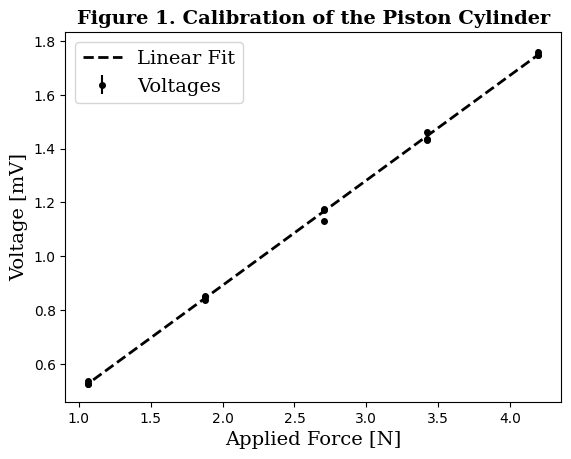

Sensor Coeff 0.39036819730454614 + 0.0029545467813557507 mV / N
R squared: 0.9992558629284835


In [77]:
# Data paths
cm1 = [
    "./Data/calibration mass 1/trial1.csv",
    "./Data/calibration mass 1/trial2.csv",
    "./Data/calibration mass 1/trial3.csv",
]
cm2 = [
    "./Data/calibration mass 2/trial1.csv",
    "./Data/calibration mass 2/trial2.csv",
    "./Data/calibration mass 2/trial3.csv",
]
cm3 = [
    "./Data/calibration mass 3/trial1.csv",
    "./Data/calibration mass 3/trial2.csv",
    "./Data/calibration mass 3/trial3.csv",
]
cm4 = [
    "./Data/calibration mass 4/trial1.csv",
    "./Data/calibration mass 4/trial2.csv",
    "./Data/calibration mass 4/trial3.csv",
]
cm5 = [
    "./Data/calibration mass 5/trial1.csv",
    "./Data/calibration mass 5/trial2.csv",
    "./Data/calibration mass 5/trial3.csv",
]

# Load data
data_cal = [
    np.loadtxt(cm1[0], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm1[1], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm1[2], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm2[0], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm2[1], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm2[2], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm3[0], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm3[1], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm3[2], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm4[0], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm4[1], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm4[2], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm5[0], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm5[1], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm5[2], delimiter=",", skiprows=7, usecols=[2]),
]

# Area of Piston head in m^2
PISTON_AREA = (np.pi / 4) * (32.5 * 0.001) ** 2

# Total force applied on each trial in Newtons
forces = (
    np.array(
        [
            35.06 + 73.372,
            35.06 + 73.372,
            35.06 + 73.372,
            35.06 + 73.372 + 82.953,
            35.06 + 73.372 + 82.953,
            35.06 + 73.372 + 82.953,
            35.06 + 73.372 + 82.953 + 84.155,
            35.06 + 73.372 + 82.953 + 84.155,
            35.06 + 73.372 + 82.953 + 84.155,
            35.06 + 73.372 + 82.953 + 84.155 + 73.089,
            35.06 + 73.372 + 82.953 + 84.155 + 73.089,
            35.06 + 73.372 + 82.953 + 84.155 + 73.089,
            35.06 + 73.372 + 82.953 + 84.155 + 73.089 + 78.739,
            35.06 + 73.372 + 82.953 + 84.155 + 73.089 + 78.739,
            35.06 + 73.372 + 82.953 + 84.155 + 73.089 + 78.739,
        ]
    )
    * (1 / 1000)
    * 9.80665
)

# Finding average and standard deviation for each trial
points = np.array([data_cal[i][2300:].mean() for i in range(len(data_cal))])
errors = np.array([(data_cal[i][2300:].std() * 2) for i in range(len(data_cal))])

# Linear regression
slope, intercept, rvalue, _, stderr = scipy.stats.linregress(forces, points)
force = np.linspace(1.1, 4.2, 1000)
curve_fit = slope * force + intercept

# Get slope in mV/Pa instead of mV/N
SENSOR_COEFF = slope * PISTON_AREA
print(f"Provided Coefficient: 0.0003373 mV/Pa")
print(f"Sensor Coefficient: {SENSOR_COEFF} mV/Pa")

# Plotting
font = dict(family="serif", size=14)
title = dict(family="serif", size=14, weight="bold")
marker = dict(color="black", linestyle="none", marker=".", markersize=8)
line = dict(color="black", linestyle="--", linewidth=2)

plt.errorbar(forces, points, errors, label="Voltages", **marker)
plt.plot(force, curve_fit, label="Linear Fit", **line)
plt.xlabel("Applied Force [N]", **font)
plt.ylabel("Voltage [mV]", **font)
plt.title("Figure 1. Calibration of the Piston Cylinder", **title)
plt.legend(prop=font)
plt.show()

print(f"Sensor Coeff {slope} + {stderr} mV / N")
print(f"R squared: {rvalue ** 2}")




In [87]:
# Data paths
om1 = [
    "./Data/oscillation mass 1/trial1.csv",
    "./Data/oscillation mass 1/trial2.csv",
    "./Data/oscillation mass 1/trial3.csv",
]
om2 = [
    "./Data/oscillation mass 2/trial1.csv",
    "./Data/oscillation mass 2/trial2.csv",
    "./Data/oscillation mass 2/trial3.csv",
]
om3 = [
    "./Data/oscillation mass 3/trial1.csv",
    "./Data/oscillation mass 3/trial2.csv",
    "./Data/oscillation mass 3/trial3.csv",
]
omn = [
    "./Data/oscillation no mass/trial1.csv",
    "./Data/oscillation no mass/trial2.csv",
    "./Data/oscillation no mass/trial3.csv",
]


# Load air oscillation data
data_air = [
    np.loadtxt(om1[0], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om1[1], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om1[2], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om2[0], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om2[1], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om2[2], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om3[0], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om3[1], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om3[2], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(omn[0], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(omn[1], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(omn[2], delimiter=",", skiprows=7, usecols=[1,2]),
]

# In Pa
ATMOSPHERIC_PRESSURE = 101325.0

# Convert mV readings to Pa using calibration coefficient
for i, data_point in enumerate(data_air):
    data_air[i][:, 1] = data_point[:, 1] * (1 / SENSOR_COEFF) + ATMOSPHERIC_PRESSURE


In [101]:
# Piston cylinder device constants in SI units
PISTON_AREA = (np.pi / 4) * ((32.5 * 0.001) ** 2)
TUBE_VOLUME = (45.05 * 0.01) * ((np.pi / 4) * ((3.863 * 0.001) ** 2))
CYLINDER_VOLUME = PISTON_AREA * (62 * 0.001)
TOTAL_VOLUME = TUBE_VOLUME + CYLINDER_VOLUME
print(TOTAL_VOLUME)
# Masses for each trial in kg
PLUNGER_MASS_AIR = np.array(
    [
        73.1 + 35.0,
        73.1 + 35.0,
        73.1 + 35.0,
        157.035 + 35.0,
        157.035 + 35.0,
        157.035 + 35.0,
        241.399 + 35.0,
        241.399 + 35.0,
        241.399 + 35.0,
        0.0 + 35.0,
        0.0 + 35.0,
        0.0 + 35.0,
    ]
) * (1 / 1000)


# Fuctions defining piston oscillations and getting kappa values
def osc(t, P_0, k, omega, C, phi):
    return P_0 + C * np.exp(-k * t / 2) * np.cos(omega * t + phi)


def calc_kappa(P_0, k, omega, m):
    return (omega**2 + (k**2 / 4)) * ((m * TOTAL_VOLUME) / (P_0 * PISTON_AREA**2))


# Kappa calcs for air

kappa_air = []

# Hand picked offsets for oscillation starts and ends
start_idxs = [1835, 1415, 1804, 748, 2043, 1920, 1539, 1659, 1038, 2167, 1907, 1980]
end_offset = [600, 400, 600, 600, 800, 400, 500, 500, 400, 800, 1200, 900]
for i, data_point in enumerate(data_air):
    start_idx = start_idxs[i]
    end_idx = start_idx + end_offset[i]
    
    # Initial parameters (P_0, k, omega, C, phi)
    init_params = [data_point[end_idx, 1], 20, 100, data_point[start_idx, 1], 2]
    
    
    osc_t = data_point[start_idx:end_idx, 0] - data_point[start_idx, 0]
    osc_P = data_point[start_idx:end_idx, 1]
    fit_params = scipy.optimize.curve_fit(osc, osc_t, osc_P, p0=init_params)

    time = np.linspace(0, osc_t[:end_idx], 1000)
    #print(f"P_0: {fit_params[0][0]}\nk: {fit_params[0][1]}\nomega: {fit_params[0][2]}\nC: {fit_params[0][3]}\nphi: {fit_params[0][4]}")
    
    kappa = calc_kappa(*fit_params[0][:3], PLUNGER_MASS_AIR[i])
    kappa_air.append(kappa)
    #print(f"Kappa: {kappa}")
    
    #plt.plot(osc_t, osc_P, ".", label="data")
    #plt.plot(time, osc(time, *fit_params[0]), "r--", label="optimized")
    #plt.legend()
    #plt.show()

print(np.array(kappa_air).mean())
print(np.array(kappa_air).std())


5.6713764297605074e-05
1.2677781436658664
0.14545699917740262


In [102]:
argon_data = [
    np.loadtxt("./Data/argon mass 1.csv", delimiter=",", skiprows=7, usecols=[1, 2]),
    np.loadtxt("./Data/argon mass 2.csv", delimiter=",", skiprows=7, usecols=[1, 2]),
    np.loadtxt("./Data/argon mass 3.csv", delimiter=",", skiprows=7, usecols=[1, 2]),
    np.loadtxt("./Data/argon mass 4.csv", delimiter=",", skiprows=7, usecols=[1, 2]),
]

# Trial cutoffs formatted as (start, end)
m1_cutoffs = [(500, 2500), (2501, 4500), (4501, 6500), (8000, 9500), (9501, 11500)]
m2_cutoffs = [(1000, 2500), (2501, 4600), (4601, 6500), (6501, 8500), (8501, 10500)]
m3_cutoffs = [(1000, 2600), (2601, 4500), (4501, 6500), (6501, 8500), (8501, 10500)]
m4_cutoffs = [(1500, 3500), (3501, 5500), (5501, 7500), (7501, 9500), (9501, 12000)]

data_argon = [
    argon_data[0][m1_cutoffs[0][0] : m1_cutoffs[0][1]],
    argon_data[0][m1_cutoffs[1][0] : m1_cutoffs[1][1]],
    argon_data[0][m1_cutoffs[2][0] : m1_cutoffs[2][1]],
    argon_data[0][m1_cutoffs[3][0] : m1_cutoffs[3][1]],
    argon_data[0][m1_cutoffs[4][0] : m1_cutoffs[4][1]],
    argon_data[1][m2_cutoffs[0][0] : m2_cutoffs[0][1]],
    argon_data[1][m2_cutoffs[1][0] : m2_cutoffs[1][1]],
    argon_data[1][m2_cutoffs[2][0] : m2_cutoffs[2][1]],
    argon_data[1][m2_cutoffs[3][0] : m2_cutoffs[3][1]],
    argon_data[1][m2_cutoffs[4][0] : m2_cutoffs[4][1]],
    argon_data[2][m3_cutoffs[0][0] : m3_cutoffs[0][1]],
    argon_data[2][m3_cutoffs[1][0] : m3_cutoffs[1][1]],
    argon_data[2][m3_cutoffs[2][0] : m3_cutoffs[2][1]],
    argon_data[2][m3_cutoffs[3][0] : m3_cutoffs[3][1]],
    argon_data[2][m3_cutoffs[4][0] : m3_cutoffs[4][1]],
    argon_data[3][m4_cutoffs[0][0] : m4_cutoffs[0][1]],
    argon_data[3][m4_cutoffs[1][0] : m4_cutoffs[1][1]],
    argon_data[3][m4_cutoffs[2][0] : m4_cutoffs[2][1]],
    argon_data[3][m4_cutoffs[3][0] : m4_cutoffs[3][1]],
    argon_data[3][m4_cutoffs[4][0] : m4_cutoffs[4][1]],
]

for i, data_point in enumerate(data_argon):
    data_argon[i][:, 1] = data_point[:, 1] * (1 / SENSOR_COEFF) + ATMOSPHERIC_PRESSURE

# Masses for each trial in kg
PLUNGER_MASS_ARGON = np.array(
    [
        0.0 + 35.0,
        0.0 + 35.0,
        0.0 + 35.0,
        0.0 + 35.0,
        0.0 + 35.0,
        74.475 + 35.0,
        74.475 + 35.0,
        74.475 + 35.0,
        74.475 + 35.0,
        74.475 + 35.0,
        148.179 + 35.0,
        148.179 + 35.0,
        148.179 + 35.0,
        148.179 + 35.0,
        148.179 + 35.0,
        222.140 + 35.0,
        222.140 + 35.0,
        222.140 + 35.0,
        222.140 + 35.0,
        222.140 + 35.0,
    ]
) * (1 / 1000)

kappa_argon = []
for i, data in enumerate(data_argon):
    start_idx = data[:, 1].argmax()
    end_idx = start_idx + 600

    # Initial parameters (P_0, k, omega, C, phi)
    init_params = [data[end_idx, 1], 20, 100, data[start_idx, 1], 2]

    osc_t = data[start_idx:end_idx, 0] - data[start_idx, 0]
    osc_P = data[start_idx:end_idx, 1]
    fit_params = scipy.optimize.curve_fit(osc, osc_t, osc_P, p0=init_params)
    time = np.linspace(0, osc_t[:end_idx], 1000)

    kappa = calc_kappa(*fit_params[0][:3], PLUNGER_MASS_ARGON[i])
    kappa_argon.append(kappa)
    #print(f"Kappa: {kappa}")

    #plt.plot(osc_t, osc_P, ".")
    #plt.plot(time, osc(time, *fit_params[0]), "r--", label="optimized")
    plt.show()

print(np.array(kappa_argon).mean())
print(np.array(kappa_argon).std())


1.3701927044152167
0.14586394098825708


In [103]:
co2_data = [
    np.loadtxt("./Data/co2 mass 1.csv", delimiter=",", skiprows=7, usecols=[1, 2]),
    np.loadtxt("./Data/co2 mass 2.csv", delimiter=",", skiprows=7, usecols=[1, 2]),
    np.loadtxt("./Data/co2 mass 3.csv", delimiter=",", skiprows=7, usecols=[1, 2]),
    np.loadtxt("./Data/co2 mass 4.csv", delimiter=",", skiprows=7, usecols=[1, 2]),
]

# Trial cutoffs formatted as (start, end)
m1_cutoffs = [(1500, 3000), (3001, 4600), (4601, 6500), (6501, 8500), (8501, 10000)]
m2_cutoffs = [(500, 2500), (2501, 4500), (4501, 6000), (6500, 8000), (8750, 10000)]
m3_cutoffs = [(500, 2000), (2500, 4000), (4500, 6500), (6501, 8500), (8501, 10500)]
m4_cutoffs = [(1000, 2500), (3000, 5000), (5001, 7000), (7001, 9000), (9500, 11500)]

data_co2 = [
    co2_data[0][m1_cutoffs[0][0] : m1_cutoffs[0][1]],
    co2_data[0][m1_cutoffs[1][0] : m1_cutoffs[1][1]],
    co2_data[0][m1_cutoffs[2][0] : m1_cutoffs[2][1]],
    co2_data[0][m1_cutoffs[3][0] : m1_cutoffs[3][1]],
    co2_data[0][m1_cutoffs[4][0] : m1_cutoffs[4][1]],
    co2_data[1][m2_cutoffs[0][0] : m2_cutoffs[0][1]],
    co2_data[1][m2_cutoffs[1][0] : m2_cutoffs[1][1]],
    co2_data[1][m2_cutoffs[2][0] : m2_cutoffs[2][1]],
    co2_data[1][m2_cutoffs[3][0] : m2_cutoffs[3][1]],
    co2_data[1][m2_cutoffs[4][0] : m2_cutoffs[4][1]],
    co2_data[2][m3_cutoffs[0][0] : m3_cutoffs[0][1]],
    co2_data[2][m3_cutoffs[1][0] : m3_cutoffs[1][1]],
    co2_data[2][m3_cutoffs[2][0] : m3_cutoffs[2][1]],
    co2_data[2][m3_cutoffs[3][0] : m3_cutoffs[3][1]],
    co2_data[2][m3_cutoffs[4][0] : m3_cutoffs[4][1]],
    co2_data[3][m4_cutoffs[0][0] : m4_cutoffs[0][1]],
    co2_data[3][m4_cutoffs[1][0] : m4_cutoffs[1][1]],
    co2_data[3][m4_cutoffs[2][0] : m4_cutoffs[2][1]],
    co2_data[3][m4_cutoffs[3][0] : m4_cutoffs[3][1]],
    co2_data[3][m4_cutoffs[4][0] : m4_cutoffs[4][1]],
]

for i, data_point in enumerate(data_co2):
    data_co2[i][:, 1] = data_point[:, 1] * (1 / SENSOR_COEFF) + ATMOSPHERIC_PRESSURE

# Masses for each trial in kg
PLUNGER_MASS_CO2 = np.array(
    [
        0.0 + 35.0,
        0.0 + 35.0,
        0.0 + 35.0,
        0.0 + 35.0,
        0.0 + 35.0,
        73.593 + 35.0,
        73.593 + 35.0,
        73.593 + 35.0,
        73.593 + 35.0,
        73.593 + 35.0,
        147.191 + 35.0,
        147.191 + 35.0,
        147.191 + 35.0,
        147.191 + 35.0,
        147.191 + 35.0,
        221.799 + 35.0,
        221.799 + 35.0,
        221.799 + 35.0,
        221.799 + 35.0,
        221.799 + 35.0,
    ]
) * (1 / 1000)

kappa_co2 = []
for i, data in enumerate(data_co2):
    start_idx = data[:, 1].argmax()
    end_idx = start_idx + 600

    # Initial parameters (P_0, k, omega, C, phi)
    init_params = [data[end_idx, 1], 20, 100, data[start_idx, 1], 2]

    osc_t = data[start_idx:end_idx, 0] - data[start_idx, 0]
    osc_P = data[start_idx:end_idx, 1]
    fit_params = scipy.optimize.curve_fit(osc, osc_t, osc_P, p0=init_params)
    time = np.linspace(0, osc_t[:end_idx], 1000)

    kappa = calc_kappa(*fit_params[0][:3], PLUNGER_MASS_CO2[i])
    kappa_co2.append(kappa)
    #print(f"Kappa: {kappa}")

    #plt.plot(osc_t, osc_P, ".")
    #plt.plot(time, osc(time, *fit_params[0]), "r--", label="optimized")
    #plt.show()


print(np.array(kappa_co2).mean())
print(np.array(kappa_co2).std())


1.2092023304703494
0.09165184790890137
